<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_annualized_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [286]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
random.seed(786)


## Importing the dataset







In [287]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [175]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [176]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Filling missing values of Target column MOIC

In [215]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string



In [216]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

0       7.0
1       7.0
2       6.0
3       8.0
4       5.0
       ... 
300    20.0
301    20.0
302    13.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 305, dtype: float64

In [217]:
dataset['annualized_return'] = ((1 + (dataset['Exit Size (millions)']-dataset['Total VC Capital Raised ($M)***']))**(1/dataset['Total duration for Company']))-1

In [218]:
dataset['annualized_return']

0           NaN
1           NaN
2           NaN
3      0.881278
4           NaN
         ...   
300         NaN
301         NaN
302         NaN
303    1.477530
304    1.477530
Name: annualized_return, Length: 305, dtype: float64

In [219]:
dataset.dropna(subset = ["annualized_return"], inplace=True) # Drop rows with no values from Target column

In [182]:
dataset.count()

Company PBID                  135
Exit Date                     135
Exit Size (millions)          135
Pre Value (millions)           54
Post Value (millions)         133
                             ... 
Company State/Province        105
Company Post Code             125
Company Country               135
Total duration for Company    135
annualized_return             135
Length: 106, dtype: int64

In [220]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]



,Total,Percent
Deal Type 3,135,100.000000
Implied EV/Net Income,135,100.000000
Debt Amount 3,135,100.000000
Debt Type 2,135,100.000000
Debt Amount 2,135,100.000000
...,...,...
VC Round,13,9.629630
Company Post Code,10,7.407407
Raised to Date,8,5.925926
CEO PBId,5,3.703704


Drop Column which has missing values more than 30%

In [221]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
dataset = dataset.drop(over30, axis = 1)


In [132]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Total duration for Company,annualized_return
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,Early Stage VC,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,8.0,0.881278
11,62307-28,5/10/19,16.00,$16.00,Merger/Acquisition,Early Stage VC,3.75,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,133659-10T,62307-28,Information Technology,Software,Database Software,"Database Software*, Media and Information Serv...","Big Data, CloudTech & DevOps, Mobile, SaaS, TMT","data collection, geospatial technology, locati...",Formerly VC-backed,Generating Revenue,Venture Capital,79257-70P,"BS (Bachelor of Science), 2002, Computer Science",6,133659-10T,24-Sep-2018,3.00,Actual,3.77,3rd Round,Early Stage VC,NaN,Venture Capital,3.00,Completed,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,US Dollars (USD),"Seattle, WA",Americas,North America,Seattle,Washington,98105,United States,8.0,0.381265
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Early Stage VC,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
19,

In [185]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Total duration for Company,annualized_return
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,Early Stage VC,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,8.0,0.881278
11,62307-28,5/10/19,16.00,$16.00,Merger/Acquisition,Early Stage VC,3.75,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,133659-10T,62307-28,Information Technology,Software,Database Software,"Database Software*, Media and Information Serv...","Big Data, CloudTech & DevOps, Mobile, SaaS, TMT","data collection, geospatial technology, locati...",Formerly VC-backed,Generating Revenue,Venture Capital,79257-70P,"BS (Bachelor of Science), 2002, Computer Science",6,133659-10T,24-Sep-2018,3.00,Actual,3.77,3rd Round,Early Stage VC,NaN,Venture Capital,3.00,Completed,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,US Dollars (USD),"Seattle, WA",Americas,North America,Seattle,Washington,98105,United States,8.0,0.381265
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Early Stage VC,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,6.0,1.179884
19,

In [222]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [223]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Post Value (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])





In [135]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Total duration for Company,annualized_return
3,Merger/Acquisition,Early Stage VC,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),8.0,0.881278
11,Merger/Acquisition,Early Stage VC,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.00,3.77,3rd Round,Early Stage VC,3.00,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,US Dollars (USD),8.0,0.381265
17,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,Seed Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),6.0,1.179884
18,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,Early Stage VC,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),6.0,1.179884
19,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,Early Stage VC,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.00,404.00,4th Round,Later Stage VC,200.00,Generating Revenue,Venture Capital-Backed,6.0,4.0,"3,719",US Dollars (USD),17.0,0.733238
295,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.00,204.00,3rd Round,Later Stage VC,181.00,Generating Revenue,Venture Capital-Backed,7.0,5.0,"3,719",US Dollars (USD),17.0,0.733238
296,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",NaN,699.00,7th Round,Later Stage VC,NaN,Generating Revenue,Venture Capital-Backed,9.0,7.0,"3,719",US Dollars (USD),17.0,0.733238
303,IPO,Series D,55.20x,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture

In [189]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Total duration for Company,annualized_return
3,Merger/Acquisition,Early Stage VC,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),8.0,0.881278
11,Merger/Acquisition,Early Stage VC,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.00,3.77,3rd Round,Early Stage VC,3.00,Generating Revenue,Venture Capital-Backed,NaN,NaN,11,US Dollars (USD),8.0,0.381265
17,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,Seed Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),6.0,1.179884
18,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,Early Stage VC,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),6.0,1.179884
19,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,Early Stage VC,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.00,404.00,4th Round,Later Stage VC,200.00,Generating Revenue,Venture Capital-Backed,6.0,4.0,"3,719",US Dollars (USD),17.0,0.733238
295,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.00,204.00,3rd Round,Later Stage VC,181.00,Generating Revenue,Venture Capital-Backed,7.0,5.0,"3,719",US Dollars (USD),17.0,0.733238
296,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",NaN,699.00,7th Round,Later Stage VC,NaN,Generating Revenue,Venture Capital-Backed,9.0,7.0,"3,719",US Dollars (USD),17.0,0.733238
303,IPO,Series D,55.20x,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture

In [224]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [225]:
dataset['# Investors']

3       2.0
11      NaN
17      6.0
18      3.0
19      8.0
       ... 
294    10.0
295    12.0
296    16.0
303    12.0
304    14.0
Name: # Investors, Length: 135, dtype: float64

In [192]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company,annualized_return
3,Merger/Acquisition,Early Stage VC,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,US Dollars (USD),8.0,0.881278
11,Merger/Acquisition,Early Stage VC,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.00,3.77,3rd Round,Early Stage VC,3.00,Generating Revenue,Venture Capital-Backed,NaN,11,US Dollars (USD),8.0,0.381265
17,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,Seed Round,3.30,Stealth,Venture Capital-Backed,6.0,NaN,US Dollars (USD),6.0,1.179884
18,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,Early Stage VC,14.50,Generating Revenue,Venture Capital-Backed,3.0,NaN,US Dollars (USD),6.0,1.179884
19,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,Early Stage VC,20.00,Generating Revenue,Venture Capital-Backed,8.0,NaN,US Dollars (USD),6.0,1.179884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.00,404.00,4th Round,Later Stage VC,200.00,Generating Revenue,Venture Capital-Backed,10.0,"3,719",US Dollars (USD),17.0,0.733238
295,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.00,204.00,3rd Round,Later Stage VC,181.00,Generating Revenue,Venture Capital-Backed,12.0,"3,719",US Dollars (USD),17.0,0.733238
296,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",NaN,699.00,7th Round,Later Stage VC,NaN,Generating Revenue,Venture Capital-Backed,16.0,"3,719",US Dollars (USD),17.0,0.733238
303,IPO,Series D,55.20x,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,Later Stage

**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [226]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
MOIC,40,29.629630
State,30,22.222222
Total Invested Equity,29,21.481481
CEO Education,27,20.000000
# Investors,24,17.777778
Deal Size,24,17.777778
Current Employees,16,11.851852
VC Round,13,9.629630
Raised to Date,8,5.925926


In [227]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [228]:
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [229]:
# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [230]:
# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [231]:
# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [232]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [233]:
dataset['VC Round']

3      1st Round
11     3rd Round
17     1st Round
18     2nd Round
19     3rd Round
         ...    
294    4th Round
295    3rd Round
296    7th Round
303    5th Round
304    4th Round
Name: VC Round, Length: 135, dtype: object

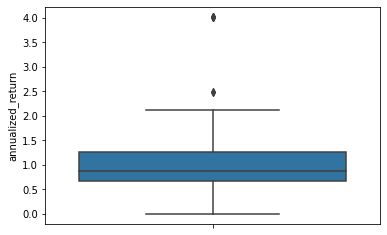

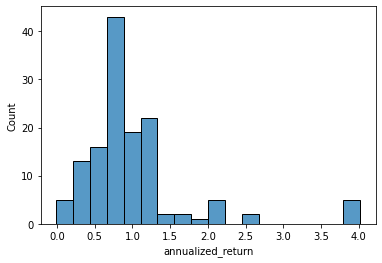

[Text(0, 0, 'Generating Revenue'),
 Text(0, 0, 'Stealth'),
 Text(0, 0, 'Product In Beta Test'),
 Text(0, 0, 'Generating Revenue/Not Profitable'),
 Text(0, 0, 'Startup'),
 Text(0, 0, 'Profitable')]

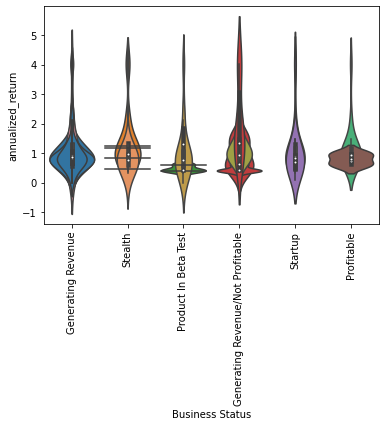

In [234]:
# check annualized_returns's distribution
import seaborn as sn

sn.boxplot(y=dataset["annualized_return"])
plt.show()
sn.histplot(dataset, x ='annualized_return')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="annualized_return", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="annualized_return", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="annualized_return", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="annualized_return", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="annualized_return", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="annualized_return", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [235]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset[['Last VC Deal Type_LE']] = le.fit_transform(dataset[['Last VC Deal Type']])

dataset[['Industry Sector_LE']] = le.fit_transform(dataset[['Industry Sector']])

dataset[['Industry Group_LE']] = le.fit_transform(dataset[['Industry Group']])

dataset[['Industry Code_LE']] = le.fit_transform(dataset[['Industry Code']])

dataset[['Verticals_LE']] = le.fit_transform(dataset[['Verticals_x']])

dataset[['City_LE']] = le.fit_transform(dataset[['City']])

dataset[['State_LE']] = le.fit_transform(dataset[['State']])
dataset[['Deal Type_LE']] = le.fit_transform(dataset[['Deal Type']])

dataset[['Country_LE']] = le.fit_transform(dataset[['Country']])
dataset[['Current Financing Status_LE']] = le.fit_transform(dataset[['Current Financing Status']])
dataset[['Current Business Status_LE']] = le.fit_transform(dataset[['Current Business Status']])
dataset[['Universe_LE']] = le.fit_transform(dataset[['Universe']])
dataset[['CEO Education_LE']] = le.fit_transform(dataset[['CEO Education']])
dataset[['VC Round_LE']] = le.fit_transform(dataset[['VC Round']])
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']])
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']])
dataset[['Native Currency of Deal_LE']] = le.fit_transform(dataset[['Native Currency of Deal']])

dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company,annualized_return,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Deal Type_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,Merger/Acquisition,Early Stage VC,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.100000,10.10,1st Round,Early Stage VC,10.100000,0,4,2.000000,6.000000,US Dollars (USD),8.0,0.881278,2,1,1,4,2,16,9,8,2,8,0,0,8,5,2,5
11,Merger/Acquisition,Early Stage VC,NaN,Information Technology,Software,Database Software,"SaaS, Mobile, Big Data, TMT, CloudTech & DevOps",Seattle,Washington,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 2002, Computer Science",3.000000,3.77,3rd Round,Early Stage VC,3.000000,0,4,7.594595,11.000000,US Dollars (USD),8.0,0.381265,2,1,1,4,4,20,22,9,2,8,0,0,8,6,4,5
17,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.300000,3.30,1st Round,Seed Round,3.300000,5,4,6.000000,1047.504202,US Dollars (USD),6.0,1.179884,2,6,1,4,11,1,19,0,6,8,0,0,8,14,2,5
18,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.500000,17.80,2nd Round,Early Stage VC,14.500000,0,4,3.000000,1047.504202,US Dollars (USD),6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,14,3,5
19,Merger/Acquisition,Series B,3.81x,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,No Known Education,20.000000,37.80,3rd Round,Early Stage VC,20.000000,0,4,8.000000,1047.504202,US Dollars (USD),6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,29,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",400.000000,404.00,4th Round,Later Stage VC,200.000000,0,4,10.000000,3719.000000,US Dollars (USD),17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,5,5
295,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, Publicly Listed, Venture Capital","University of California, Berkeley, BS (Bachel...",181.000000,204.00,3rd Round,Later Stage VC,181.000000,0,4,12.000000,3719.000000,US Dollars (USD),17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,4,5
296,IPO,Later Stage VC,NaN,Information Technology,Software,Entertainment Software,"Virtual Reality, Augmented Reality, Gaming, TM...",San Francisco,California,United States,Formerly VC-backed,Generating Revenue/Not Profitable,"M&A, P

In [236]:
# removing original columns after label encoding



dataset=dataset.drop(columns=['State','Exit Type','Last VC Deal Type','Industry Sector','Industry Group','Industry Code','Verticals_x','City','State','Country'])

dataset=dataset.drop(columns=['Current Financing Status','Current Business Status','Universe','CEO Education','VC Round','Business Status','Financing Status','Native Currency of Deal'])			  	 


dataset

,MOIC,Deal Size,Raised to Date,Deal Type,Total Invested Equity,# Investors,Current Employees,Total duration for Company,annualized_return,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Deal Type_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44x,10.100000,10.10,Early Stage VC,10.100000,2.000000,6.000000,8.0,0.881278,2,1,1,4,2,16,9,8,2,8,0,0,8,5,2,5
11,NaN,3.000000,3.77,Early Stage VC,3.000000,7.594595,11.000000,8.0,0.381265,2,1,1,4,4,20,22,9,2,8,0,0,8,6,4,5
17,3.81x,3.300000,3.30,Seed Round,3.300000,6.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,6,8,0,0,8,14,2,5
18,3.81x,14.500000,17.80,Early Stage VC,14.500000,3.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,14,3,5
19,3.81x,20.000000,37.80,Early Stage VC,20.000000,8.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,29,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,NaN,400.000000,404.00,Later Stage VC,200.000000,10.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,5,5
295,NaN,181.000000,204.00,Later Stage VC,181.000000,12.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,4,5
296,NaN,69.372793,699.00,Later Stage VC,68.865189,16.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,8,5
303,55.20x,114.970000,160.75,Later Stage VC,114.970000,12.000000,3871.000000,10.0,1.477530,1,9,1,4,3,21,19,0,5,8,0,2,7,29,6,5


Changing Data type of Column to perform correlation matrix

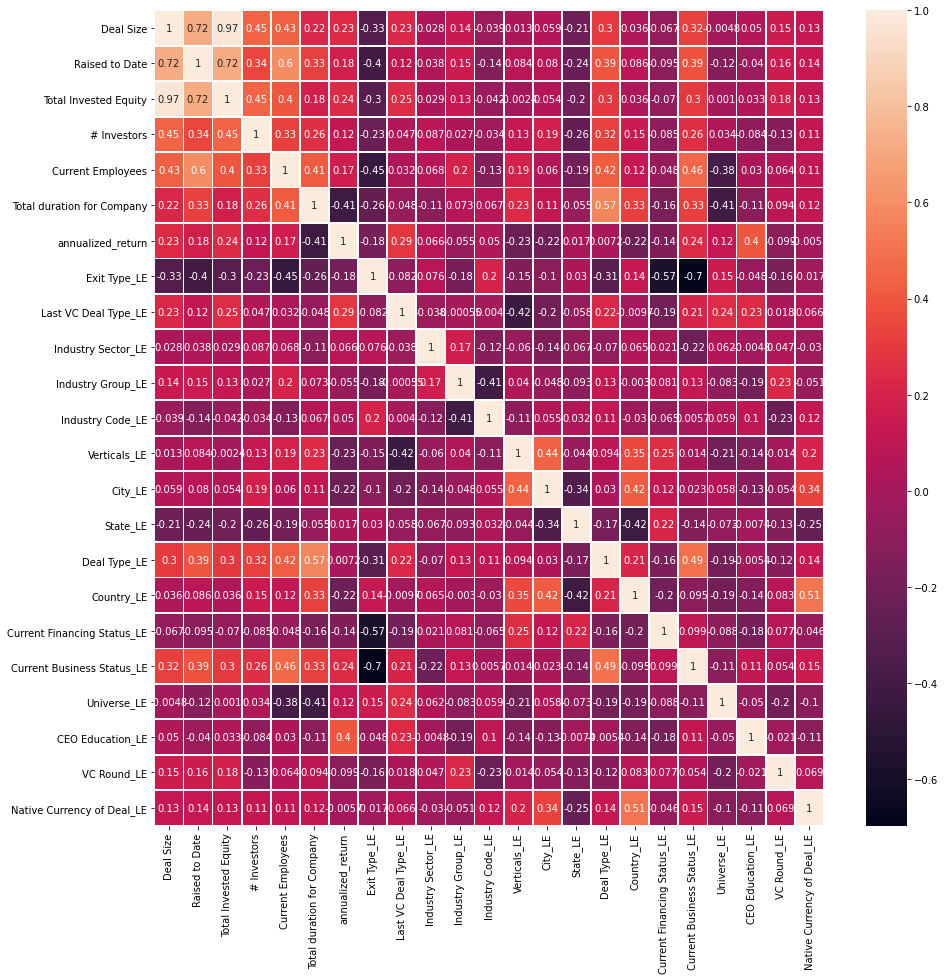

In [237]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

In [238]:
dataset=dataset.drop(columns=['Deal Size','Deal Type'])

In [239]:
dataset=dataset.drop(columns=['MOIC'])

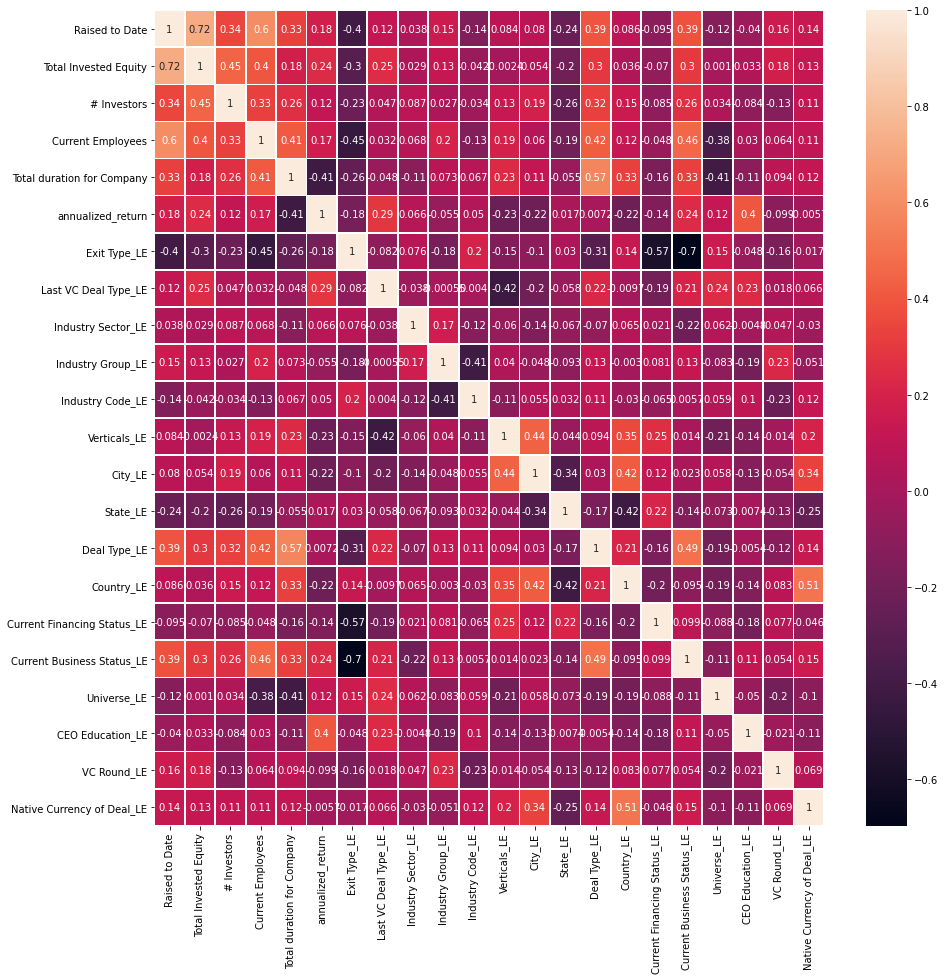

In [240]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [154]:
dataset

,Raised to Date,Deal Type,Total Invested Equity,# Investors,Current Employees,Total duration for Company,annualized_return,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,10.10,Early Stage VC,10.100000,2.000000,6.000000,8.0,0.881278,2,1,1,4,2,16,9,8,8,0,0,8,5,2,5
11,3.77,Early Stage VC,3.000000,7.594595,11.000000,8.0,0.381265,2,1,1,4,4,20,22,9,8,0,0,8,6,4,5
17,3.30,Seed Round,3.300000,6.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,8,0,0,8,14,2,5
18,17.80,Early Stage VC,14.500000,3.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,8,0,0,8,14,3,5
19,37.80,Early Stage VC,20.000000,8.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,8,0,0,8,29,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,404.00,Later Stage VC,200.000000,10.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,8,0,1,4,42,5,5
295,204.00,Later Stage VC,181.000000,12.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,8,0,1,4,42,4,5
296,699.00,Later Stage VC,68.865189,16.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,8,0,1,4,42,8,5
303,160.75,Later Stage VC,114.970000,12.000000,3871.000000,10.0,1.477530,1,9,1,4,3,21,19,0,8,0,2,7,29,6,5


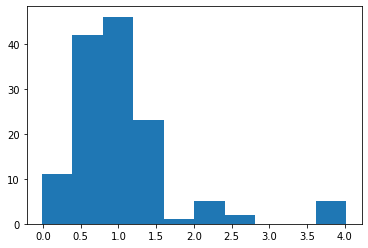

In [241]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['annualized_return'])
pyplot.show()

In [242]:
dataset

,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,annualized_return,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Deal Type_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,10.10,10.100000,2.000000,6.000000,8.0,0.881278,2,1,1,4,2,16,9,8,2,8,0,0,8,5,2,5
11,3.77,3.000000,7.594595,11.000000,8.0,0.381265,2,1,1,4,4,20,22,9,2,8,0,0,8,6,4,5
17,3.30,3.300000,6.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,6,8,0,0,8,14,2,5
18,17.80,14.500000,3.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,14,3,5
19,37.80,20.000000,8.000000,1047.504202,6.0,1.179884,2,6,1,4,11,1,19,0,2,8,0,0,8,29,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,404.00,200.000000,10.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,5,5
295,204.00,181.000000,12.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,4,5
296,699.00,68.865189,16.000000,3719.000000,17.0,0.733238,1,2,1,4,6,28,18,0,5,8,0,1,4,42,8,5
303,160.75,114.970000,12.000000,3871.000000,10.0,1.477530,1,9,1,4,3,21,19,0,5,8,0,2,7,29,6,5


In [250]:
X1 = dataset.iloc[:, 0:5]
X2 = dataset.iloc[:, 6:-1]
X= pd.concat([X1,X2],axis=1)
Y = dataset.iloc[:, 5:6]

In [251]:
X

,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Deal Type_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE
3,10.10,10.100000,2.000000,6.000000,8.0,2,1,1,4,2,16,9,8,2,8,0,0,8,5,2
11,3.77,3.000000,7.594595,11.000000,8.0,2,1,1,4,4,20,22,9,2,8,0,0,8,6,4
17,3.30,3.300000,6.000000,1047.504202,6.0,2,6,1,4,11,1,19,0,6,8,0,0,8,14,2
18,17.80,14.500000,3.000000,1047.504202,6.0,2,6,1,4,11,1,19,0,2,8,0,0,8,14,3
19,37.80,20.000000,8.000000,1047.504202,6.0,2,6,1,4,11,1,19,0,2,8,0,0,8,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,404.00,200.000000,10.000000,3719.000000,17.0,1,2,1,4,6,28,18,0,5,8,0,1,4,42,5
295,204.00,181.000000,12.000000,3719.000000,17.0,1,2,1,4,6,28,18,0,5,8,0,1,4,42,4
296,699.00,68.865189,16.000000,3719.000000,17.0,1,2,1,4,6,28,18,0,5,8,0,1,4,42,8
303,160.75,114.970000,12.000000,3871.000000,10.0,1,9,1,4,3,21,19,0,5,8,0,2,7,29,6


In [252]:
Y

,annualized_return
3,0.881278
11,0.381265
17,1.179884
18,1.179884
19,1.179884
...,...
294,0.733238
295,0.733238
296,0.733238
303,1.477530


## Splitting the dataset into the Training set and Test set

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [254]:
print(y_train)

     annualized_return
87            1.043730
126           0.651244
248           0.685961
94            0.447923
296           0.733238
..                 ...
161           0.621715
293           0.733238
196           0.865881
162           0.621715
89            0.951366

[108 rows x 1 columns]


In [255]:
print(y_test)

     annualized_return
99            0.430052
88            1.043730
224           0.874627
21            0.846184
155           1.309087
263           0.852689
127           0.879568
41            0.724604
117           1.237312
281           2.125256
159           1.309087
280           0.558666
102           0.916303
136           0.988898
218           0.545661
276           1.300948
85            0.972636
195           0.865881
288           0.944336
40            0.724604
109           0.936805
223           0.874627
103           0.916303
77            0.686081
19            1.179884
292           0.733238
279           1.300948


In [256]:
print(X_train)

     Raised to Date  Total Invested Equity  ...  CEO Education_LE  VC Round_LE
87            99.33              65.000000  ...                41            4
126           29.50              16.500000  ...                39            5
248            5.72               5.500000  ...                 3            3
94            16.50              11.000000  ...                 2            4
296          699.00              68.865189  ...                42            8
..              ...                    ...  ...               ...          ...
161            0.50               0.500000  ...                25            2
293          549.00             145.000000  ...                42            6
196          228.00              68.865189  ...                37            6
162            0.50              68.865189  ...                25           12
89            85.75              46.000000  ...                 0            6

[108 rows x 20 columns]


In [ ]:
print(X_test)

      Deal Size  Raised to Date  ...  CEO Education_LE  VC Round_LE
288  110.000000      345.500000  ...                31            7
267   90.000000      173.700000  ...                44            5
269  252.500000      252.500000  ...                39            2
253   15.000000       37.500000  ...                29            5
289   75.000000      235.500000  ...                31            6
158   55.941717        0.800000  ...                42           11
250    0.070000      118.873558  ...                 4           11
157    0.120000        1.840000  ...                42           11
137   15.700000       27.100000  ...                 2            3
187    2.050000        7.070000  ...                 6            3
161    0.500000        0.500000  ...                21            1
18    14.500000       17.800000  ...                12            2
249    0.100000        0.220000  ...                 4           11
290   80.000000      160.500000  ...            

Defining Function for Model Performance evaluation

### Building Models

In [267]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test["annualized_return"].values
    print(f"{pr1}")

   
  

Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [269]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [270]:
y_predtrain.mean(axis=0)

array([1.0427227])

evaluating model performance

In [271]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 0.42294508272807035
RMSE Test error is 0.36591379268403035
MAE Train error is 0.3101456143562397
MAE Test error is 0.2960970009004443
        Pred    Actual
0  -0.038942  0.430052
1   1.123459  1.043730
2   0.756275  0.874627
3   0.131591  0.846184
4   1.629123  1.309087
5   1.456894  0.852689
6   0.912986  0.879568
7   0.758963  0.724604
8   0.636982  1.237312
9   2.164953  2.125256
10  1.583111  1.309087
11  0.852554  0.558666
12  1.266598  0.916303
13  0.921862  0.988898
14  0.635454  0.545661
15  2.073740  1.300948
16  1.536978  0.972636
17  1.296275  0.865881
18  1.318007  0.944336
19  0.772418  0.724604
20  1.271457  0.936805
21  1.115788  0.874627
22  1.244715  0.916303
23  0.646004  0.686081
24  1.450513  1.179884
25  0.398584  0.733238
26  1.133675  1.300948


Ridge Regression

---



In [274]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [275]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 0.567
Config: {'alpha': 0.22}


In [276]:

ridge_model= Ridge(alpha=0.11)
ridge_model.fit(X_train,y_train)
y_predtrain= ridge_model.predict(X_train)




In [277]:
y_predtest= ridge_model.predict(X_test)



Evaluating model performance

In [278]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 0.423110821700201
RMSE Test error is 0.3638585933499038
MAE Train error is 0.3105031219044277
MAE Test error is 0.2976633394156592
        Pred    Actual
0  -0.029219  0.430052
1   1.119504  1.043730
2   0.762160  0.874627
3   0.146458  0.846184
4   1.633544  1.309087
5   1.456614  0.852689
6   0.920431  0.879568
7   0.781717  0.724604
8   0.652366  1.237312
9   2.172897  2.125256
10  1.585800  1.309087
11  0.834939  0.558666
12  1.291154  0.916303
13  0.908181  0.988898
14  0.638158  0.545661
15  2.083797  1.300948
16  1.524526  0.972636
17  1.260418  0.865881
18  1.314693  0.944336
19  0.794190  0.724604
20  1.267391  0.936805
21  1.123628  0.874627
22  1.269665  0.916303
23  0.632207  0.686081
24  1.458940  1.179884
25  0.403783  0.733238
26  1.135823  1.300948


In [ ]:
#ridge_regressor.cv_results_

### Lasso Regression

In [279]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.906330830794717, tolerance: 0.0069895579767241915
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/d

In [280]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 0.562
 {'alpha': 0.01}


In [281]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrain= lasso_model.predict(X_train)



In [282]:
y_predtest= ridge_model.predict(X_test)


Evaluating model performance

In [283]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 0.6326893276726486
RMSE Test error is 0.3638585933499038
MAE Train error is 0.42283365355560226
MAE Test error is 0.2976633394156592
        Pred    Actual
0  -0.029219  0.430052
1   1.119504  1.043730
2   0.762160  0.874627
3   0.146458  0.846184
4   1.633544  1.309087
5   1.456614  0.852689
6   0.920431  0.879568
7   0.781717  0.724604
8   0.652366  1.237312
9   2.172897  2.125256
10  1.585800  1.309087
11  0.834939  0.558666
12  1.291154  0.916303
13  0.908181  0.988898
14  0.638158  0.545661
15  2.083797  1.300948
16  1.524526  0.972636
17  1.260418  0.865881
18  1.314693  0.944336
19  0.794190  0.724604
20  1.267391  0.936805
21  1.123628  0.874627
22  1.269665  0.916303
23  0.632207  0.686081
24  1.458940  1.179884
25  0.403783  0.733238
26  1.135823  1.300948


In [ ]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

#coeffs = lasso_model.sparse_coef_  # sparse matrix

#coeffs = lasso_model.intercept_    # probably also releva

coeffs



array([ 2.89497288e-03, -2.33215193e-02,  1.69356757e-02, -8.51662917e-02,
        7.97980463e-03, -1.01063651e+00, -0.00000000e+00, -9.04875533e-02,
        0.00000000e+00,  2.63487064e-01, -7.23959108e-02,  4.47847186e-01,
        1.54704964e-01, -5.75684938e-02, -2.04804252e-01,  2.99826635e+00,
        3.14728407e+00, -3.87095142e-02,  6.92989441e-03,  1.61704670e-02])

In [ ]:
X_test

,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE
288,110.000000,345.500000,110.000000,13.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,7
267,90.000000,173.700000,90.000000,11.000000,669.000000,12.0,1,9,1,3,2,7,19,0,7,1,1,6,44,5
269,252.500000,252.500000,252.500000,11.000000,2968.000000,8.0,2,7,1,3,12,18,19,0,7,1,0,6,39,2
253,15.000000,37.500000,15.000000,5.000000,123.000000,16.0,1,7,1,3,8,18,19,0,7,1,1,6,29,5
289,75.000000,235.500000,75.000000,12.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,6
158,55.941717,0.800000,56.760213,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
250,0.070000,118.873558,56.760213,4.000000,11.000000,8.0,2,4,1,3,2,18,19,0,7,1,0,7,4,11
157,0.120000,1.840000,0.120000,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
137,15.700000,27.100000,15.700000,2.000000,112.000000,8.0,2,7,1,3,9,14,16,0,7,1,0,7,2,3
187,2.050000,7.070000,2.050000,6.000000,6.000000,6.0,2,3,1,3,12,13,23,11,7,1,0,7,6,3


### XGBOOST

In [ ]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 

  


Predicting results

In [ ]:
y_trainpred=xgb_r.predict(train_dmatrix)
y_testpred = xgb_r.predict(test_dmatrix) 

Model Performance evaluation

In [ ]:
 eval_result(y_train,y_predtrain,y_test,y_predtest)